<a href="https://colab.research.google.com/github/ranjeetpatilgit/applied_data-science_Assingments/blob/main/Black_Friday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

Data Loading


In [2]:
df=pd.read_csv("train.csv")
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
112931,1005434,P00149242,F,26-35,7,A,1,1,8,NaN,NaN,2046.0
112932,1005434,P00287942,F,26-35,7,A,1,1,8,14.0,NaN,9758.0
112933,1005434,P00120242,F,26-35,7,A,1,1,8,NaN,NaN,8091.0
112934,1005434,P00243942,F,26-35,7,A,1,1,1,2.0,15.0,15179.0


Data Understanding


In [3]:
df.shape

(112936, 12)

In [4]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,1.129360e+05,112936.000000,112936.000000,112936.000000,77794.000000,34540.000000,112935.000000
mean,1.002931e+06,8.093699,0.408683,5.294822,9.855079,12.658975,9303.174543
std,1.682332e+03,6.522573,0.491593,3.740002,5.085552,4.123074,4973.375291
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001455e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5855.000000
50%,1.002986e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8052.000000
75%,1.004342e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12056.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112936 entries, 0 to 112935
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     112936 non-null  int64  
 1   Product_ID                  112936 non-null  object 
 2   Gender                      112936 non-null  object 
 3   Age                         112936 non-null  object 
 4   Occupation                  112936 non-null  int64  
 5   City_Category               112936 non-null  object 
 6   Stay_In_Current_City_Years  112936 non-null  object 
 7   Marital_Status              112936 non-null  int64  
 8   Product_Category_1          112936 non-null  int64  
 9   Product_Category_2          77794 non-null   float64
 10  Product_Category_3          34540 non-null   float64
 11  Purchase                    112935 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 10.3+ MB


In [6]:
df.isnull().sum()

User_ID                           0
Product_ID                        0
Gender                            0
Age                               0
Occupation                        0
City_Category                     0
Stay_In_Current_City_Years        0
Marital_Status                    0
Product_Category_1                0
Product_Category_2            35142
Product_Category_3            78396
Purchase                          1
dtype: int64

Data Visualization

<Axes: xlabel='Gender', ylabel='count'>

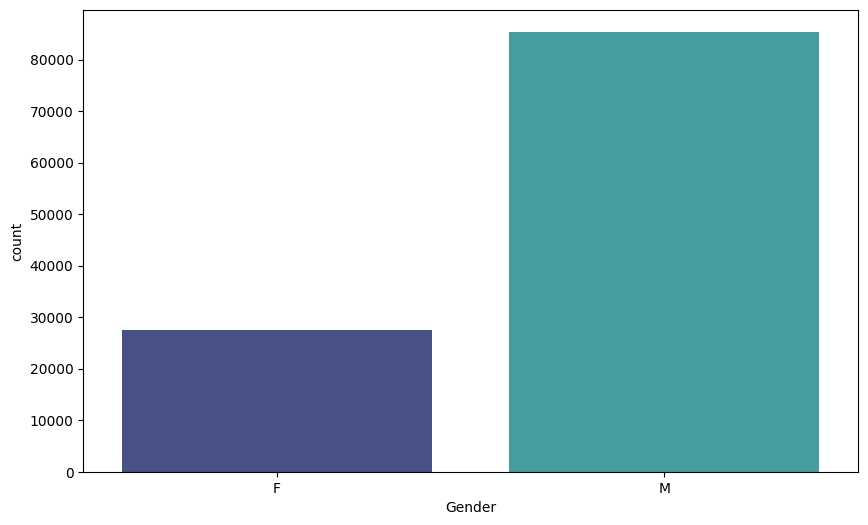

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Gender',palette='mako')

<Axes: xlabel='Gender', ylabel='Marital_Status'>

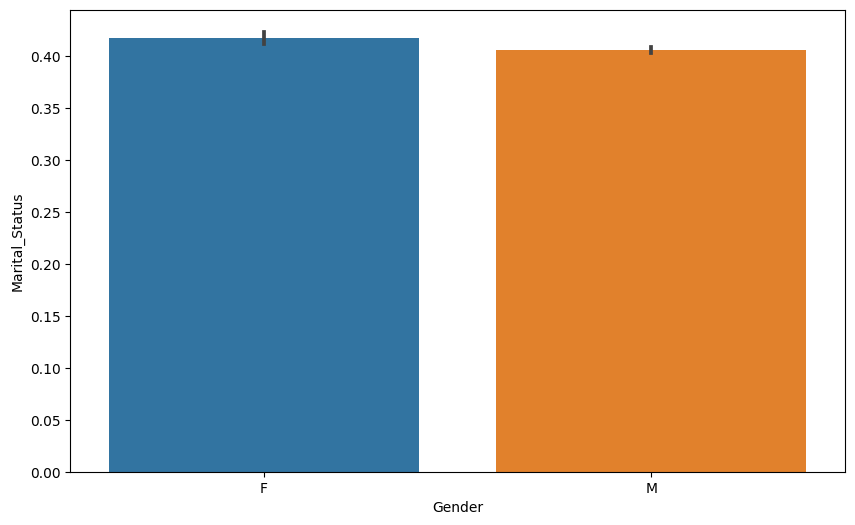

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender',y='Marital_Status',data=df)

<Axes: xlabel='Gender', ylabel='Purchase'>

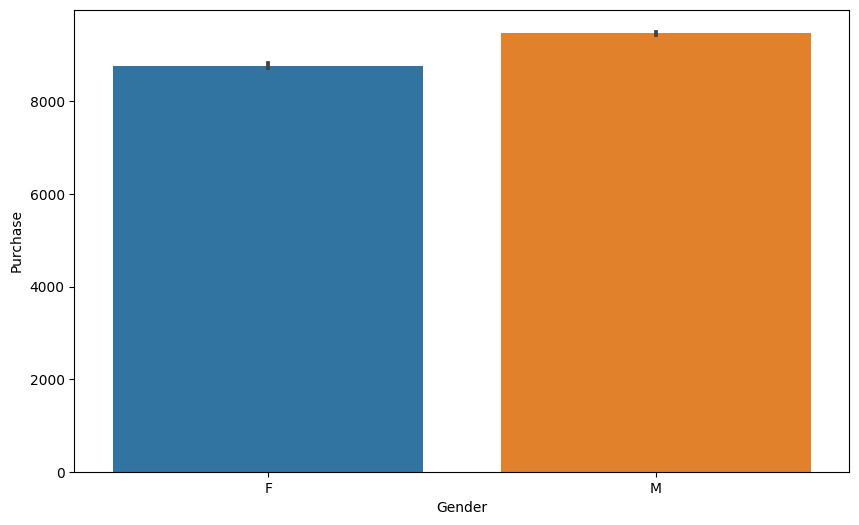

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender',y='Purchase',data=df)
## Higher purchases have been done by the male gender as compared to the female.

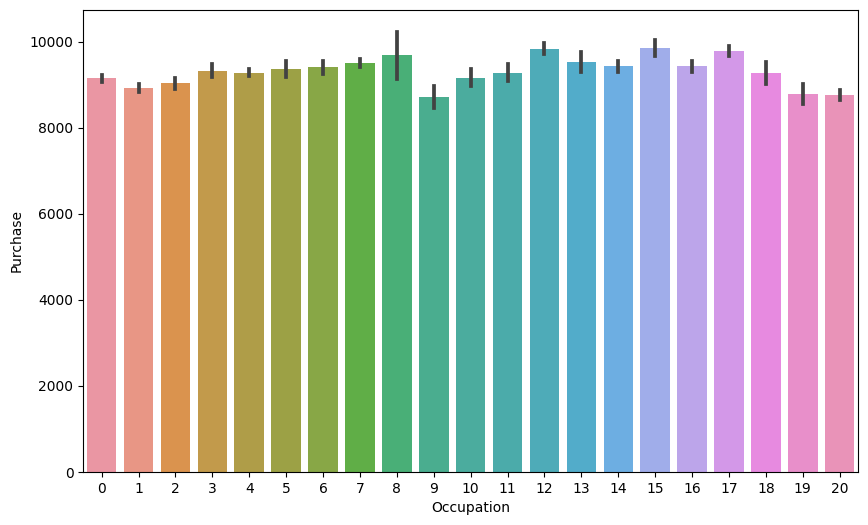

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Occupation',y='Purchase',data=df);
## Occupation has a direct effect on the purchases done by the customer and the occupation codes 12,15,17 have higher purchases.

<Axes: xlabel='Occupation', ylabel='Purchase'>

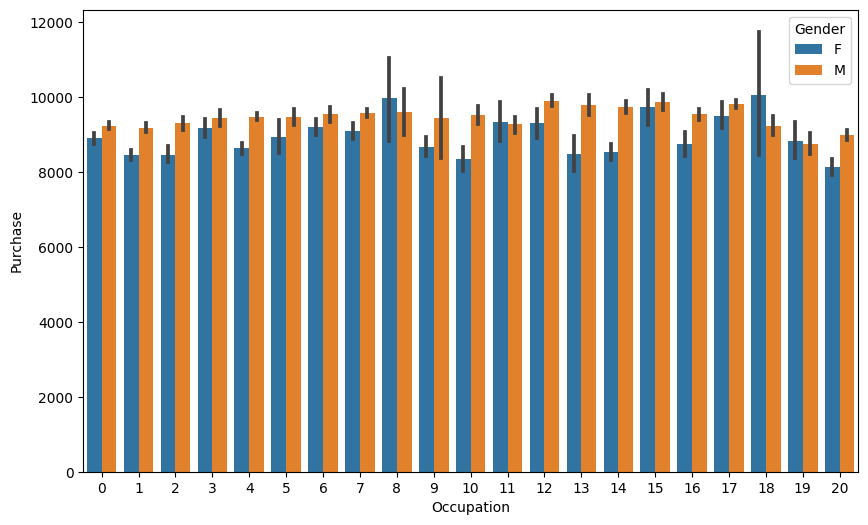

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Occupation',y='Purchase',hue='Gender',data=df)
## In this graph it can be seen that the female gender in the occupation 18 with higher purchases compared to others.

Outliers Detection


 Checking the presence of Outliers using outliers

<Axes: xlabel='Gender', ylabel='Purchase'>

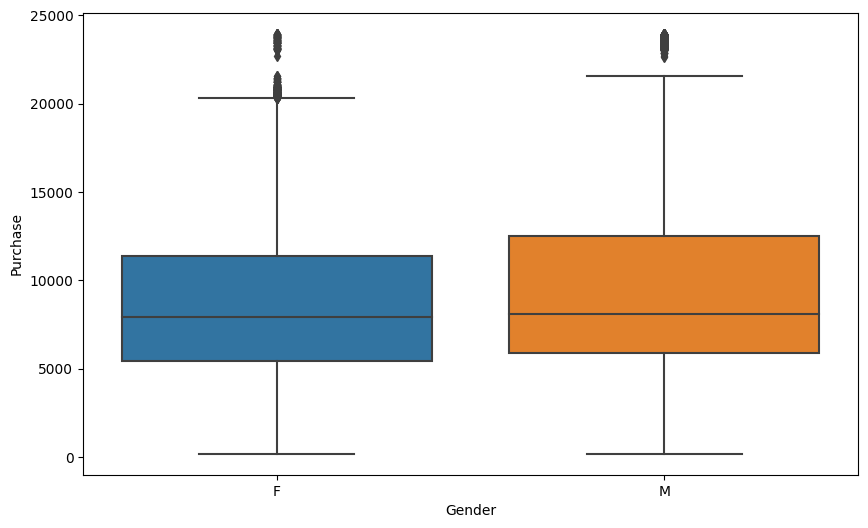

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Gender", y="Purchase")
## Using boxplot we can detect the presence of outliers in the data.

<Axes: xlabel='Occupation', ylabel='Purchase'>

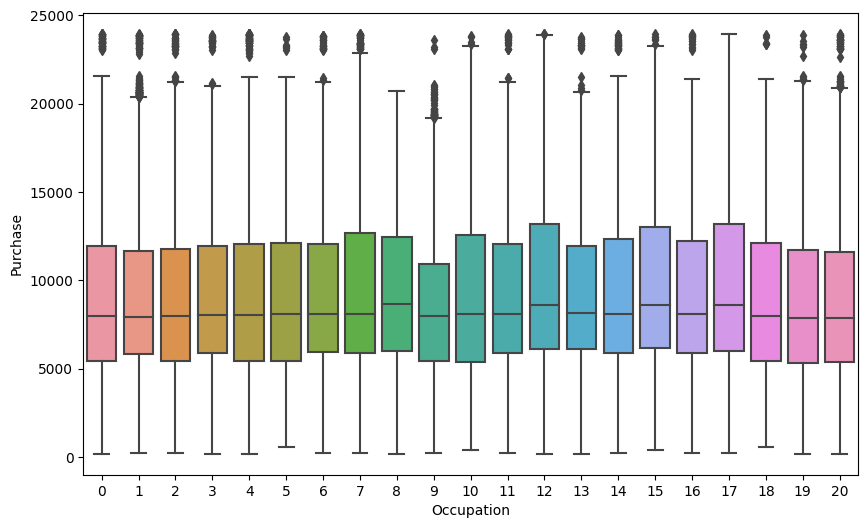

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Occupation", y="Purchase")
## The purchase column has outliers which may effect the performance of the machine learning models.

<Axes: xlabel='Age', ylabel='Purchase'>

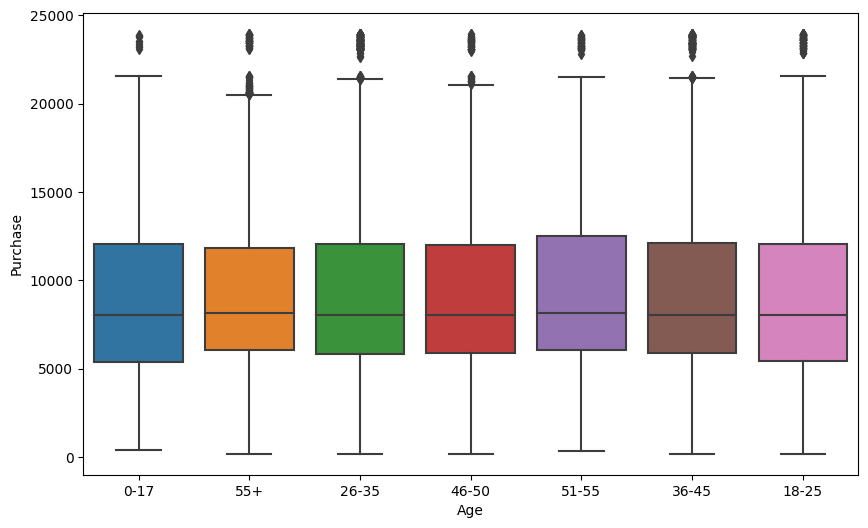

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Age", y="Purchase")
## We can see below that the Age with Purchases again have some outliers present in them.

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

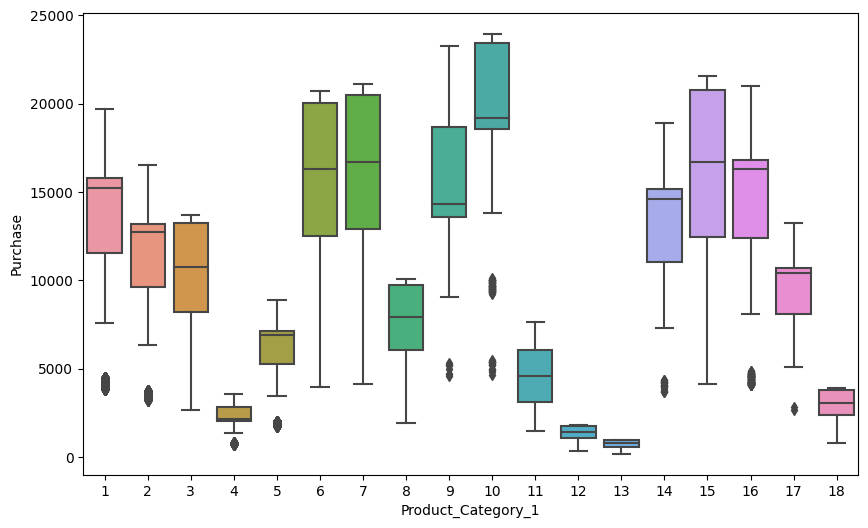

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="Product_Category_1", y="Purchase")
## There are outliers present in the Product category as well.

Data Preprocessing

In [17]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
112931,1005434,P00149242,F,26-35,7,A,1,1,8,NaN,NaN,2046.0
112932,1005434,P00287942,F,26-35,7,A,1,1,8,14.0,NaN,9758.0
112933,1005434,P00120242,F,26-35,7,A,1,1,8,NaN,NaN,8091.0
112934,1005434,P00243942,F,26-35,7,A,1,1,1,2.0,15.0,15179.0


In [18]:
df['Product_ID'] = df['Product_ID'].str.replace('P00', '')
ss = StandardScaler()
df['Product_ID'] = ss.fit_transform(df['Product_ID'].values.reshape(-1, 1))
## Replacing ''P00'' with no value and scaling the ProductID column.

In [19]:
df.drop(['Product_Category_3'],axis=1,inplace=True)
## There are more than 50 percent missing values present in the Product_category_column so we will drop that column.

In [20]:
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mean())
## The missing data in the product category 2 column have been imputed using mean.

In [21]:
df.isnull().sum()
## As we can see the missing values have been successfully imputed and now there are no null values present in the dataset.

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      1
dtype: int64

In [22]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,-1.026992,F,0-17,10,A,2,0,3,9.855079,8370.0
1,1000001,0.741050,F,0-17,10,A,2,0,1,6.000000,15200.0
2,1000001,-0.842228,F,0-17,10,A,2,0,12,9.855079,1422.0
3,1000001,-0.865815,F,0-17,10,A,2,0,12,14.000000,1057.0
4,1000002,1.099769,M,55+,16,C,4+,0,8,9.855079,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
112931,1005434,-0.238793,F,26-35,7,A,1,1,8,9.855079,2046.0
112932,1005434,1.124339,F,26-35,7,A,1,1,8,14.000000,9758.0
112933,1005434,-0.523803,F,26-35,7,A,1,1,8,9.855079,8091.0
112934,1005434,0.691910,F,26-35,7,A,1,1,1,2.000000,15179.0


Label Encoding is a Technique used to turn catagorical variable to numerical veriable

In [23]:
cat_cols=['Gender','City_Category','Age']
le=LabelEncoder()
for i in cat_cols:
    df[i]=le.fit_transform(df[i])
df.dtypes
## The label encoding technique will now replace all the categorical variables to numeric for easier computation.

User_ID                         int64
Product_ID                    float64
Gender                          int64
Age                             int64
Occupation                      int64
City_Category                   int64
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Purchase                      float64
dtype: object

In [24]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].replace('4+','4')
## Values in the Stay_In_Current_City_Years column has been changed from 4+ to 4

In [25]:
df['Gender']=df['Gender'].astype(int)
df['Age']=df['Age'].astype(int)
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
## The gender, Age and Stay_In_Current_City_Years values are changed to integer types.

In [26]:
df['City_Category']=df['City_Category'].astype('category')
## The type of city_category has been changed from int to category.

In [27]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,-1.026992,0,0,10,0,2,0,3,9.855079,8370.0
1,1000001,0.741050,0,0,10,0,2,0,1,6.000000,15200.0
2,1000001,-0.842228,0,0,10,0,2,0,12,9.855079,1422.0
3,1000001,-0.865815,0,0,10,0,2,0,12,14.000000,1057.0
4,1000002,1.099769,1,6,16,2,4,0,8,9.855079,7969.0
...,...,...,...,...,...,...,...,...,...,...,...
112931,1005434,-0.238793,0,2,7,0,1,1,8,9.855079,2046.0
112932,1005434,1.124339,0,2,7,0,1,1,8,14.000000,9758.0
112933,1005434,-0.523803,0,2,7,0,1,1,8,9.855079,8091.0
112934,1005434,0.691910,0,2,7,0,1,1,1,2.000000,15179.0


<ipython-input-28-f5438ea96e15>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col[index]],ax=ax[i][j])
<ipython-input-28-f5438ea96e15>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col[index]],ax=ax[i][j])
<ipython-input-28-f5438ea96e15>:8: UserWarning: 

`distplot` is a deprecated f

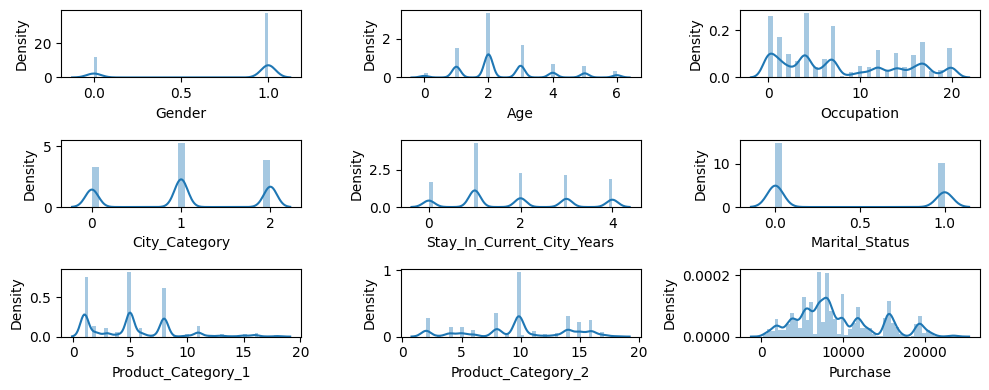

In [28]:
rows=3
cols=3
fig, ax=plt.subplots(nrows=rows,ncols=cols,figsize=(10,4))
col=df.columns
index=2
for i in range(rows):
    for j in range(cols):
        sns.distplot(df[col[index]],ax=ax[i][j])
        index=index+1

plt.tight_layout()
## The distribution plot helps us to detect the skewness of the data.Below as it can be seen that the purchase column

log Transformation

In [29]:
df['Purchase']=np.log(df['Purchase'])
## The log transformation will help us transform the data and change the data to normal distribution

In [30]:
df= pd.get_dummies(df)
df.head()
## The get_dummies() function is used to convert categorical variable into dummy/indicator variables.

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,City_Category_0,City_Category_1,City_Category_2
0,1000001,-1.026992,0,0,10,2,0,3,9.855079,9.032409,1,0,0
1,1000001,0.741050,0,0,10,2,0,1,6.000000,9.629051,1,0,0
2,1000001,-0.842228,0,0,10,2,0,12,9.855079,7.259820,1,0,0
3,1000001,-0.865815,0,0,10,2,0,12,14.000000,6.963190,1,0,0
4,1000002,1.099769,1,6,16,4,0,8,9.855079,8.983314,0,0,1


Train Test Slipt

In [31]:
X=df.drop(labels=['Purchase'],axis=1)
Y=df['Purchase']
X.head()
## The data is split into X and Y where independent and dependent variables have been separated.

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,City_Category_0,City_Category_1,City_Category_2
0,1000001,-1.026992,0,0,10,2,0,3,9.855079,1,0,0
1,1000001,0.741050,0,0,10,2,0,1,6.000000,1,0,0
2,1000001,-0.842228,0,0,10,2,0,12,9.855079,1,0,0
3,1000001,-0.865815,0,0,10,2,0,12,14.000000,1,0,0
4,1000002,1.099769,1,6,16,4,0,8,9.855079,0,0,1


In [38]:
# Target column.

Y.fillna(999, inplace=True)
Y

0           9.032409
1           9.629051
2           7.259820
3           6.963190
4           8.983314
             ...    
112931      7.623642
112932      9.185843
112933      8.998508
112934      9.627668
112935    999.000000
Name: Purchase, Length: 112936, dtype: float64

80% train and 20% is used for testing

In [39]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)
## The data has been split into Train and test.

(90348, 12) (22588, 12) (90348,) (22588,)


Scaling Data

In [40]:
scaled=StandardScaler()
X_train=scaled.fit_transform(X_train)
X_test=scaled.transform(X_test)
## StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance.

Maching Lerning

Linear Regression

In [41]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [42]:
Y_predict=model.predict(X_test)
## Predicting on X_test

In [43]:
score=r2_score(Y_test,Y_predict)
mae=mean_absolute_error(Y_test,Y_predict)
mse=mean_squared_error(Y_test,Y_predict)
rmse=(np.sqrt(mean_squared_error(Y_test,Y_predict)))
print('r2_score: ',score)
print('mean_absolute_error: ',mae)
print('mean_squared_error: ',mse)
print('root_mean_squared_error: ',rmse)

r2_score:  0.12337567709841912
mean_absolute_error:  0.4411260470690196
mean_squared_error:  0.37010342957398434
root_mean_squared_error:  0.6083612656752436


DecisionTree Regressor

In [44]:
DT=DecisionTreeRegressor(max_depth=9)
DT.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=9)

In [45]:
#predicting train
train_preds=DT.predict(X_train)
#predicting on test
test_preds=DT.predict(X_test)

In [46]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',DT.score(X_train, Y_train))
print('RSquared value on test:',DT.score(X_test, Y_test))

RMSE TrainingData =  0.362372751781772
RMSE TestData =  0.37144018217061836
--------------------------------------------------
RSquared value on train: 0.9883409552309211
RSquared value on test: 0.67321043951006


Random forest

In [48]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor().fit(X_train,Y_train)

In [51]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',RF.score(X_train, Y_train))
print('RSquared value on test:',RF.score(X_test, Y_test))

RMSE TrainingData =  0.362372751781772
RMSE TestData =  0.37144018217061836
--------------------------------------------------
RSquared value on train: 0.8715804087040923
RSquared value on test: -1.7880065950911135


In [52]:
df_test=pd.read_csv('test.csv')
## Loading test dataset

In [53]:
df_test

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


In [54]:
df_test.isnull().sum()
## Checking for missing values present in the test dataset

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [55]:
df_test['Product_ID'] = df_test['Product_ID'].str.replace('P00', '')
ss = StandardScaler()
df_test['Product_ID'] = ss.fit_transform(df_test['Product_ID'].values.reshape(-1, 1))
## The 'P00' value has been replaced int he ProductId column and the column has been scaled.

In [56]:
  df_test.drop(['Product_Category_3'],axis=1,inplace=True)
## As the Product_Category_3 column in the train set had been removed. Same has been done here aswel

In [57]:
df_test['Product_Category_2']=df_test['Product_Category_2'].fillna(df_test['Product_Category_2'].mean())
## Product_Category_2 has been imputed with mean

In [58]:
df_test.isnull().sum()
## As we see there are no null values in the test dataframe as well.

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
dtype: int64

In [59]:
df_test

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2
0,1000004,-0.434752,M,46-50,7,B,2,1,1,11.000000
1,1000009,-0.587188,M,26-35,17,C,0,0,3,5.000000
2,1000010,1.133865,F,36-45,1,B,4+,1,5,14.000000
3,1000010,-0.273465,F,36-45,1,B,4+,1,4,9.000000
4,1000011,-1.173330,F,26-35,1,C,1,0,4,5.000000
...,...,...,...,...,...,...,...,...,...,...
233594,1006036,-0.533098,F,26-35,15,B,4+,1,8,9.849586
233595,1006036,0.801456,F,26-35,15,B,4+,1,5,8.000000
233596,1006036,-1.389691,F,26-35,15,B,4+,1,1,5.000000
233597,1006037,-0.476058,F,46-50,1,C,4+,0,10,16.000000


In [60]:
cat_cols=['Gender','City_Category','Age']
le=LabelEncoder()
for i in cat_cols:
    df_test[i]=le.fit_transform(df_test[i])
df_test.dtypes
## The label encoding technique will now replace all the categorical variables to numeric for easier computation.

User_ID                         int64
Product_ID                    float64
Gender                          int64
Age                             int64
Occupation                      int64
City_Category                   int64
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
dtype: object

In [61]:
df_test['Stay_In_Current_City_Years']=df_test['Stay_In_Current_City_Years'].replace('4+','4')
## The 4+ value in the Stay_In_Current_City_Years have been replaced with only 4.

In [62]:
df_test['Gender']=df_test['Gender'].astype(int)
df_test['Age']=df_test['Age'].astype(int)
df_test['Stay_In_Current_City_Years']=df_test['Stay_In_Current_City_Years'].astype(int)
df_test['City_Category']=df_test['City_Category'].astype('category')
## The values in the test set have been converted to integer types as done in the train set.

In [63]:
df_test= pd.get_dummies(df_test)
## Dummies are created for the test set.

In [64]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,City_Category_0,City_Category_1,City_Category_2
0,1000004,-0.434752,1,4,7,2,1,1,11.0,0,1,0
1,1000009,-0.587188,1,2,17,0,0,3,5.0,0,0,1
2,1000010,1.133865,0,3,1,4,1,5,14.0,0,1,0
3,1000010,-0.273465,0,3,1,4,1,4,9.0,0,1,0
4,1000011,-1.173330,0,2,1,1,0,4,5.0,0,0,1


In [65]:
df.shape


(112936, 13)

In [66]:
df_test.shape
# test data shape

(233599, 12)

In [67]:
df

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,City_Category_0,City_Category_1,City_Category_2
0,1000001,-1.026992,0,0,10,2,0,3,9.855079,9.032409,1,0,0
1,1000001,0.741050,0,0,10,2,0,1,6.000000,9.629051,1,0,0
2,1000001,-0.842228,0,0,10,2,0,12,9.855079,7.259820,1,0,0
3,1000001,-0.865815,0,0,10,2,0,12,14.000000,6.963190,1,0,0
4,1000002,1.099769,1,6,16,4,0,8,9.855079,8.983314,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112931,1005434,-0.238793,0,2,7,1,1,8,9.855079,7.623642,1,0,0
112932,1005434,1.124339,0,2,7,1,1,8,14.000000,9.185843,1,0,0
112933,1005434,-0.523803,0,2,7,1,1,8,9.855079,8.998508,1,0,0
112934,1005434,0.691910,0,2,7,1,1,1,2.000000,9.627668,1,0,0


In [69]:
df_test

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,City_Category_0,City_Category_1,City_Category_2
0,1000004,-0.434752,1,4,7,2,1,1,11.000000,0,1,0
1,1000009,-0.587188,1,2,17,0,0,3,5.000000,0,0,1
2,1000010,1.133865,0,3,1,4,1,5,14.000000,0,1,0
3,1000010,-0.273465,0,3,1,4,1,4,9.000000,0,1,0
4,1000011,-1.173330,0,2,1,1,0,4,5.000000,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,-0.533098,0,2,15,4,1,8,9.849586,0,1,0
233595,1006036,0.801456,0,2,15,4,1,5,8.000000,0,1,0
233596,1006036,-1.389691,0,2,15,4,1,1,5.000000,0,1,0
233597,1006037,-0.476058,0,4,1,4,0,10,16.000000,0,0,1


In [70]:
test_preds= RF.predict(df_test)
len(test_preds)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


233599

In [71]:
id_frame=pd.read_csv('test.csv')

In [72]:
ID_info= id_frame[["User_ID","Product_ID"]]
ID_info.head()
## Using User_Id and Product_Id from the test set.

,User_ID,Product_ID
0,1000004,P00128942
1,1000009,P00113442
2,1000010,P00288442
3,1000010,P00145342
4,1000011,P00053842


In [73]:
predictions= pd.DataFrame(test_preds, columns=["Purchase"])
predictions["User_ID"]= ID_info["User_ID"]
predictions["Product_ID"]= ID_info["Product_ID"]
predictions.head()
## Predictions have been save in the form of a dataframe

,Purchase,User_ID,Product_ID
0,9.765884,1000004,P00128942
1,9.248415,1000009,P00113442
2,7.835945,1000010,P00288442
3,7.871794,1000010,P00145342
4,7.729308,1000011,P00053842


In [74]:
predictions.to_csv('BlackFridayPredictions.csv', index=False)
## Finally converted the prediction into csv format.